<a href="https://colab.research.google.com/github/prudhvimeda/personal-dairy/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/train.csv",header=0)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df['SSN'].value_counts()

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [ ]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
df.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [ ]:
del df['ID']
del df['Name']
#del df['SSN']
#del df['Occupation']
del df['Type_of_Loan']
del df['Customer_ID']

In [ ]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
for col in df.columns:
  df[col]=df[col].replace({'!@9#%8':np.nan,'#F%$D@*&8':'NAN-00-000','_______':np.nan,'__-333333333333333333333333333__':np.nan,'NM':np.nan,'_':np.nan,'__10000__':np.nan})

In [ ]:
df['SSN']=df['SSN'].apply(lambda x:x.split('-')[0])
df['SSN']=df['SSN'].replace('NAN',np.nan)

In [ ]:
df.isnull().sum()

Month                           0
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [ ]:
df=df.applymap(lambda x:x if x is np.nan or not isinstance(x,str) else str(x).strip('_ ,"'))
#.replace(['','NM','nan','!@9#%8','#F%$D@*&8'],np.nan)

In [ ]:
df.isnull().sum()

Month                           0
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [ ]:
df.head()

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,821,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,821,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,821,Scientist,19114.12,NaN,3,4,3,4,3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,821,Scientist,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,821,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df['Credit_History_Age']=df['Credit_History_Age'].replace(np.nan,'0 Years and 0 Months')

In [ ]:
def get_months(x):
  data=x.split(" ")
  return str(int(data[0])*12+int(data[3]))
df['Credit_History_Age']=df['Credit_History_Age'].map(get_months)

In [ ]:
df['Age']=df['Age'].astype(int)
df['Age']=np.where(df['Age']>75,np.nan,df['Age'])
df['Age']=np.where(df['Age']<18,np.nan,df['Age'])
#df['Num_Bank_Accounts']=np.where(df['Num_Bank_Accounts']<0,np.nan,df['Num_Bank_Accounts'])
#df['Delay_from_due_date']=np.where(df['Delay_from_due_date']<0,np.nan,df['Delay_from_due_date'])

In [ ]:
df['Annual_Income']=df['Annual_Income'].astype(float)
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float)
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float)
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)
df['Num_of_Loan']=df['Num_of_Loan'].astype(int)
df['Num_of_Delayed_Payment']=pd.to_numeric(df['Num_of_Delayed_Payment'])
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float)
df['Credit_History_Age']=df['Credit_History_Age'].astype(int)
df['SSN']=df['SSN'].astype(float)

In [ ]:
df.isnull().sum()

Month                           0
Age                          8487
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       91513 non-null   float64
 2   SSN                       94428 non-null   float64
 3   Occupation                92938 non-null   object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  int64  
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       91513 non-null   float64
 2   SSN                       94428 non-null   float64
 3   Occupation                92938 non-null   object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  int64  
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

In [ ]:
df.isnull().sum()

Month                           0
Age                          8487
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
imputer_int=KNNImputer(missing_values=np.nan,n_neighbors=5,weights='uniform',metric='nan_euclidean',copy=True,add_indicator=False)
df['Age']=imputer_int.fit_transform(df[['Age']])
df['Monthly_Inhand_Salary']=imputer_int.fit_transform(df[['Monthly_Inhand_Salary']])
df['Num_Bank_Accounts']=imputer_int.fit_transform(df[['Num_Bank_Accounts']])
df['Delay_from_due_date']=imputer_int.fit_transform(df[['Delay_from_due_date']])
df['Num_Credit_Inquiries']=imputer_int.fit_transform(df[['Num_Credit_Inquiries']])
df['Amount_invested_monthly']=imputer_int.fit_transform(df[['Amount_invested_monthly']])
df['Monthly_Balance']=imputer_int.fit_transform(df[['Monthly_Balance']])
df['Num_of_Delayed_Payment']=imputer_int.fit_transform(df[['Num_of_Delayed_Payment']])
df['Changed_Credit_Limit']=imputer_int.fit_transform(df[['Changed_Credit_Limit']])
df['Annual_Income']=imputer_int.fit_transform(df[['Annual_Income']])
df['Num_Credit_Card']=imputer_int.fit_transform(df[['Num_Credit_Card']])
df['Interest_Rate']=imputer_int.fit_transform(df[['Interest_Rate']])
df['Num_of_Loan']=imputer_int.fit_transform(df[['Num_of_Loan']])
df['Outstanding_Debt']=imputer_int.fit_transform(df[['Outstanding_Debt']])
df['Credit_Utilization_Ratio']=imputer_int.fit_transform(df[['Credit_Utilization_Ratio']])
df['Total_EMI_per_month']=imputer_int.fit_transform(df[['Total_EMI_per_month']])
df['SSN']=imputer_int.fit_transform(df[['SSN']])

In [ ]:
from sklearn.impute import SimpleImputer
imputer_str=SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=None,verbose=0,copy=True,add_indicator=False)
df['Credit_Mix']=imputer_str.fit_transform(df[['Credit_Mix']])
df['Payment_Behaviour']=imputer_str.fit_transform(df[['Payment_Behaviour']])
df['Payment_of_Min_Amount']=imputer_str.fit_transform(df[['Payment_of_Min_Amount']])
df['Occupation']=imputer_str.fit_transform(df[['Occupation']])

In [ ]:
df.head()

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.000000,821.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.000000,11.270000,4.0,Standard,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.000000,821.0,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,-1.0,30.923342,11.270000,4.0,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,34.426409,821.0,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,3.0,7.000000,10.389025,4.0,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.000000,821.0,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,5.0,4.000000,6.270000,4.0,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.000000,821.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,30.923342,11.270000,4.0,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
df.isnull().sum()

Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   SSN                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [ ]:
df['Age_Level']=pd.cut(df['Age'],3,labels=["youth","adult","Seniors"])
del df['Age']

In [ ]:
df['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [ ]:
dict={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
df['Month']=df['Month'].map(dict)

In [ ]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Payment_Behaviour']=lb.fit_transform(df['Payment_Behaviour'])
df['Credit_Score']=lb.fit_transform(df['Credit_Score'])
df['Payment_of_Min_Amount']=lb.fit_transform(df['Payment_of_Min_Amount'])
df['Credit_Mix']=lb.fit_transform(df['Credit_Mix'])
df['Occupation']=lb.fit_transform(df['Occupation'])
df['Age_Level']=lb.fit_transform(df['Age_Level'])

In [ ]:
df['Credit_Score'].value_counts()

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

In [ ]:
#df['Age']=df['Age'].astype(int)
df['Num_Bank_Accounts']=df['Num_Bank_Accounts'].astype(int)
df['Delay_from_due_date']=df['Delay_from_due_date'].astype(int)
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(int)
df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].astype(int)
df['Num_of_Loan']=df['Num_of_Loan'].astype(int)
df['Interest_Rate']=df['Interest_Rate'].astype(int)
df['Num_Credit_Card']=df['Num_Credit_Card'].astype(int)
df['SSN']=df['SSN'].astype(int)

In [ ]:
df['Month'].value_counts()

1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: Month, dtype: int64

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   SSN                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int64  
 13  Credit_Mix                100000 non-null  in

In [ ]:
numeric_cols=[col for col in df.columns if(df[col].dtype=='int64')|(df[col].dtype=='float64')]
#for x in list(numeric_cols):
 # p,q=np.percentile(df.loc[:,x],[75,25])
  #intr_qr=p-q
  #max=p+(1.5*intr_qr)
  #min=q-(1.5*intr_qr)
  #df.loc[df[x]<min,x]=np.nan
  #df.loc[df[x]>max,x]=np.nan

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |(df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df.shape

(60122, 24)

In [ ]:
df.isnull().sum()

Month                       0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Age_Level                   0
dtype: int64

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
indepvar=[]
for i in df.columns:
  if i!='Credit_Score':
    indepvar.append(i)
targetvar='Credit_Score'
x=df[indepvar]
y=df[targetvar]

In [ ]:
df.head()

,Month,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age_Level
0,1,821,12,19114.12,1824.843333,3,4,3,4,3,7,11.270000,4,2,809.98,26.822620,265,0,49.574949,80.415295,2,312.494089,0,2
1,2,821,12,19114.12,4194.170850,3,4,3,4,-1,30,11.270000,4,1,809.98,31.944960,0,0,49.574949,118.280222,3,284.629162,0,2
2,3,821,12,19114.12,4194.170850,3,4,3,4,3,7,10.389025,4,1,809.98,28.609352,267,0,49.574949,81.699521,4,331.209863,0,1
3,4,821,12,19114.12,4194.170850,3,4,3,4,5,4,6.270000,4,1,809.98,31.377862,268,0,49.574949,199.458074,5,223.451310,0,2
4,5,821,12,19114.12,1824.843333,3,4,3,4,6,30,11.270000,4,1,809.98,24.797347,269,0,49.574949,41.420153,1,341.489231,0,2


In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((48097, 23), (12025, 23), (48097,), (12025,))

In [ ]:
import collections
cols=[]
for i in df.columns:
  if i!='Credit_Score' and i!='Payment_of_Min_Amount':
    cols.append(i)
cols

['Month',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Age_Level']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)
x_test[cols]=mmscaler.fit_transform(x_test[cols])
x_test=pd.DataFrame(x_test)

[[ 951   14 1020]
 [ 152 1991 1371]
 [ 569  865 5092]]
training score  0.6675468324427719
testing  0.6681081081081081
ROC Score: 0.8155943731659477
F1 Score: [0.52009844 0.62374687 0.72696124]
              precision    recall  f1-score   support

           0       0.57      0.48      0.52      1985
           1       0.69      0.57      0.62      3514
           2       0.68      0.78      0.73      6526

    accuracy                           0.67     12025
   macro avg       0.65      0.61      0.62     12025
weighted avg       0.67      0.67      0.66     12025



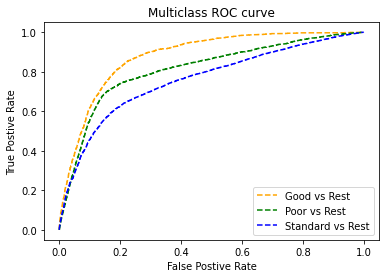

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[1154  122  709]
 [ 125 2404  985]
 [ 683  956 4887]]
training score  1.0
testing  0.7022869022869023
ROC Score: 0.7486278862081395
F1 Score: [0.58474791 0.68724986 0.7457084 ]
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1985
           1       0.69      0.68      0.69      3514
           2       0.74      0.75      0.75      6526

    accuracy                           0.70     12025
   macro avg       0.67      0.67      0.67     12025
weighted avg       0.70      0.70      0.70     12025



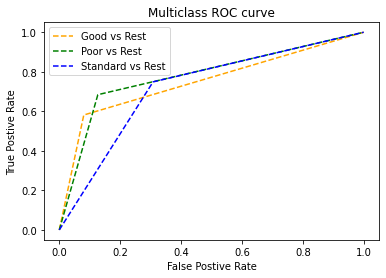

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[1388   16  581]
 [ 105 2800  609]
 [ 428  719 5379]]
training score  1.0
testing  0.7955925155925156
ROC Score: 0.9154809684976709
F1 Score: [0.71070148 0.79443893 0.82153494]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1985
           1       0.79      0.80      0.79      3514
           2       0.82      0.82      0.82      6526

    accuracy                           0.80     12025
   macro avg       0.78      0.77      0.78     12025
weighted avg       0.80      0.80      0.80     12025



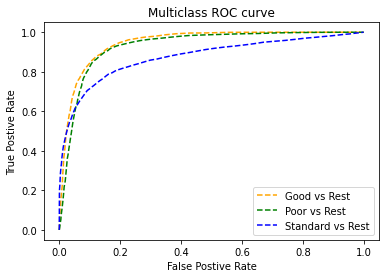

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[1378    0  607]
 [  94 2783  637]
 [ 438  703 5385]]
training score  1.0
testing  0.7938461538461539
ROC Score: 0.916894523080332
F1 Score: [0.70757381 0.79514286 0.81870011]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1985
           1       0.80      0.79      0.80      3514
           2       0.81      0.83      0.82      6526

    accuracy                           0.79     12025
   macro avg       0.78      0.77      0.77     12025
weighted avg       0.79      0.79      0.79     12025



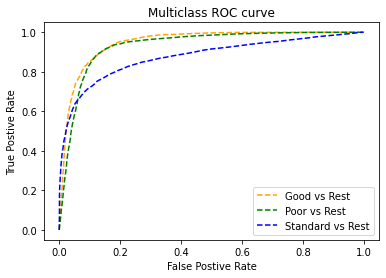

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[1144   20  821]
 [ 213 2378  923]
 [ 629  821 5076]]
training score  0.724452668565607
testing  0.715010395010395
ROC Score: 0.8621411958330473
F1 Score: [0.57617729 0.7063716  0.76067736]
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1985
           1       0.74      0.68      0.71      3514
           2       0.74      0.78      0.76      6526

    accuracy                           0.72     12025
   macro avg       0.69      0.68      0.68     12025
weighted avg       0.71      0.72      0.71     12025



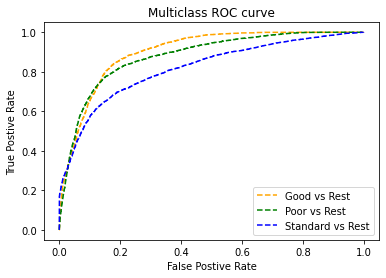

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[1111  100  774]
 [ 279 2320  915]
 [ 669  861 4996]]
training score  0.7987192548391792
testing  0.7007900207900208
ROC Score: 0.8305661152877677
F1 Score: [0.54945598 0.68285504 0.75633941]
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1985
           1       0.71      0.66      0.68      3514
           2       0.75      0.77      0.76      6526

    accuracy                           0.70     12025
   macro avg       0.66      0.66      0.66     12025
weighted avg       0.70      0.70      0.70     12025



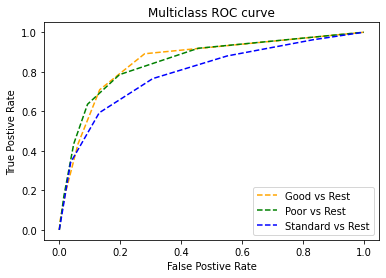

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[1614   21  350]
 [ 543 2439  532]
 [1596 1166 3764]]
training score  0.650872195771046
testing  0.6500623700623701
ROC Score: 0.7951238781917555
F1 Score: [0.56256535 0.68319328 0.67382743]
              precision    recall  f1-score   support

           0       0.43      0.81      0.56      1985
           1       0.67      0.69      0.68      3514
           2       0.81      0.58      0.67      6526

    accuracy                           0.65     12025
   macro avg       0.64      0.69      0.64     12025
weighted avg       0.71      0.65      0.66     12025



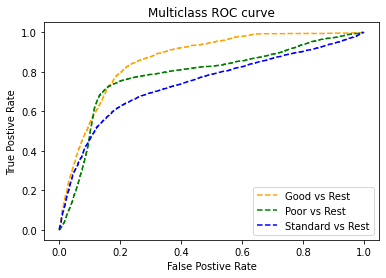

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,f1_score
m1=LogisticRegression()
m2=DecisionTreeClassifier()
m3=RandomForestClassifier(n_estimators=80)
m4=ExtraTreesClassifier(n_estimators=80)
m5=XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
m6=KNeighborsClassifier(n_neighbors=5)
m7=GaussianNB()
#m8=SVC(kernel='sigmoid',probability=True)
model=[m1,m2,m3,m4,m5,m6,m7]
for i in model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  y_pred_prob=i.predict_proba(x_test)
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  print('training score ',i.score(x_train,y_train))
  print('testing ',i.score(x_test,y_test))
  print('ROC Score:',roc_auc_score(y_test,y_pred_prob,multi_class='ovo',average='weighted'))
  print('F1 Score:',f1_score(y_test,y_pred,average=None))
  print(classification_report(y_test,y_pred))
  fpr={}
  tpr={}
  thresh={}
  n_class=3
  for j in range(n_class):
    fpr[j],tpr[j],thresh[j]=roc_curve(y_test,y_pred_prob[:,j],pos_label=j)
  plt.plot(fpr[0],tpr[0],linestyle='--',color='orange',label='Good vs Rest')
  plt.plot(fpr[1],tpr[1],linestyle='--',color='green',label='Poor vs Rest')
  plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label='Standard vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Postive Rate')
  plt.ylabel('True Postive Rate')
  plt.legend(loc='best')
  plt.show()
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------------------------')